![prob3](header.jpg)

### Problema 3

Infelizmente um vírus acaba de sofrer uma mutação e passou das gaivotas
para os humanos, contaminando as pessoas. No início você tem uma pessoa
contaminada (o *paciente zero*), que poderá contaminar outras
pessoas ao encontrá-las. Determine as informações que você precisa
para construir um modelo de propagação da doença e qual seria este
modelo. Investigue os limites da validade do seu modelo.

Informação: taxa de contágio $\alpha$ entre contaminados e não-contaminados.
(Sug. $\alpha=0.002$)

Informação: taxa de mortalidade $\beta$ de contaminados. (Sug. $\beta=0.06$)
\begin{eqnarray*}
Pop & = & 1000000 \\
C_1 & = & 1 \\
S_1 & = & Pop - C_1 \\
M_\infty & = & 0 \\
I_\infty & = & 0
\end{eqnarray*}

Primeiro calculamos quantas novas pessoas terão adoecido no momento $n$:

$$ A_n = \frac{\alpha S_nC_n}{Pop} $$

E atualizamos os números de pessoas sadias e contaminadas

\begin{eqnarray*}
S_{n+1}     & = & S_n - A_n \\
C_{n+1}     & = & C_n + A_n
\end{eqnarray*}

Algumas destes novos doentes vão morrer, outros vão ficar imunizados:

\begin{eqnarray*}
M_\infty & = & M_\infty + \beta*A_n \\
I_\infty & = & I_\infty + (1-\beta)*A_n
\end{eqnarray*}

0  - Sadias: 99979 Mortas: 0 Imunizadas: 0 Total: 100000
100  - Sadias: 99856 Mortas: 6 Imunizadas: 116 Total: 100000
200  - Sadias: 99056 Mortas: 46 Imunizadas: 876 Total: 100001
300  - Sadias: 94099 Mortas: 293 Imunizadas: 5585 Total: 100001
400  - Sadias: 70717 Mortas: 1463 Imunizadas: 27798 Total: 100000
500  - Sadias: 26523 Mortas: 3672 Imunizadas: 69782 Total: 100000
600  - Sadias: 5058 Mortas: 4746 Imunizadas: 90174 Total: 100000
700  - Sadias: 776 Mortas: 4960 Imunizadas: 94241 Total: 100000


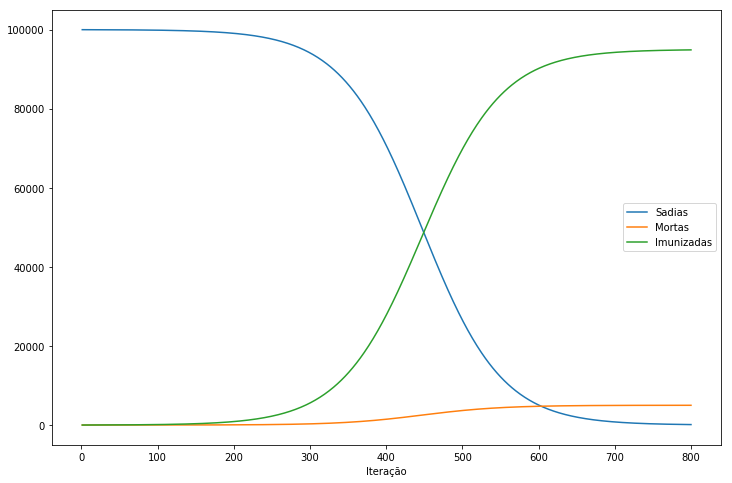

In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import math
repet = 800
Pop = 100000
iniciais = 21
sadias = Pop - iniciais
mortas = 0
imunizadas = 0
contaminadas = iniciais

contagio = 0.02
mortalidade = 0.05

listaSadias = np.zeros(repet)
listaMortas = np.zeros(repet)
listaImuniz = np.zeros(repet)

for it in range(repet):

    if it % 100 == 0:
        print(it," - Sadias:",int(sadias),"Mortas:",int(mortas),"Imunizadas:",int(imunizadas),"Total:",math.ceil(iniciais+sadias+mortas+imunizadas))
    
    adoecem = contagio * sadias * contaminadas / Pop
    contaminadas = contaminadas + (1 - mortalidade) * adoecem
    mortas = mortas + mortalidade * adoecem
    imunizadas = imunizadas + (1 - mortalidade) * adoecem
    sadias = sadias - adoecem
    
    listaSadias[it] = sadias
    listaMortas[it] = mortas
    listaImuniz[it] = imunizadas
    
its = np.linspace(1,repet,repet) # 1, 2, 3..., repet
plt.xlabel("Iteração")
plt.plot(its,listaSadias,label="Sadias")
plt.plot(its,listaMortas,label="Mortas")
plt.plot(its,listaImuniz,label="Imunizadas")
plt.legend()
plt.show()